# My favorite Scikit-Learn algorithms

This notebook contains a demonstrations and visualisations of my three favorite algorithms available through scikit-learn Python library [1]. 

***

## 1. Choosing Scikit-Learn: The Benefits

`Scikit-learn` is one of the most useful open-source libraries available for Python, widely used for Machine Learning purposes. It contains large collection of very efficient statistical and machile learning tools, e.g. regression, classification, dimensionary reduction and clustering.
It has been developed by David Cournapeau initially and it developed in the communicity-driven project where anyone can contribute towards its development. It is built upon `NumPy` [4], `SciPy` [5] and `Matplotlib` [6].


As mentioned, scikit-learn comes with plenty of interesting features. Some of which are:
* **Supervised learning argorithms**, e.g. Linear regression, Decision Trees, Bayesian methods
* **Unsupervised learning algorithms** e.g. custer analysis, factoring, unsupervised neural networks
* **Feature extraction**, meaning you can extract features from pictures or text
* **Cross validation**, meaning that validity of supervised models on unseen data can be validated and checked for accuracy
* **Dimensionality reduction**, meaning a number of attributes in data can be reduced for subsequent visualization, summarization or feature selection
* **Clustering** i.e. grouping of unlabeled data
* **Ensemble methods**, meaning predictions of several supervised models combines

Scikit-learn is a great choice of library for machine learning and there are many benefits to it:
* It is free with minimum licencing restrictions
* It is user friendly and easy to use
* It is versatile and useful for different real-life situations
* Provides clear and useful documentations for both end users or users who want to implement the algorithms to their own platforms

***

## 2. Installing Scikit-Learn

There are some prerequisites, so make sure you have the following installed:
* Python (>=3.5)
* NumPy (>=1.11.0)
* SciPy (>=0.17.0)
* Joblib (>=0.11)
* Matplotlib (>=1.5.1)
* Pandas (>=0.18.0)

All instructions with regards to installation can be found in the main documentation of `scikit-learn` library [2]. For more information refer to [this link](http://scikit-learn.org/stable/install.html). Anaconda [3] comes with `scikit-learn` by default, but, if needed it can be installed manually by typing `conda install scikit-learn` in a terminal.

***

## 3. Playing with Algorithms

### Predictions

One of my favorite algorithams available in `scikit-learn` is **prediction**. If the prediction task is to classify the observations in a set of finite labels, in other words to “name” the objects observed, the task is said to be a classification task. On the other hand, if the goal is to predict a continuous target variable, it is said to be a regression task.

In [1]:
#Importing relevant modules.
import numpy as np
import pandas as pd
import matplotlib.pylab as ply
import matplotlib.pyplot as plt

plt.style.use('ggplot')

I want to use red wine quality dataset, which lists a bunch of different wine traits, e.g. density, pH, sulphates, alcohol and its quality, ranging from 3 to 8. I want to see whether I can predict the wine quality (y) with those traits (x).<br>
First, I have to check my data. Then, I will create a model using a part of the data and in the end make a prediction on the rest of the data and see how the model performed. <br>
Let's check the data first.

In [90]:
# Load dataset from csv.
df=pd.read_csv(r'C:\Users\mvukas\repo\winequality-red.csv',delimiter=';')

In [91]:
# First five rows.
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [92]:
#Descriptive statistics.
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [93]:
# I will delete the columns I will not use. For the clarity I will use four variables to predict the quality of wine.
df.drop(df.iloc[:, 0:7], inplace = True, axis = 1)

In [94]:
df.describe()

,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.996747,3.311113,0.658149,10.422983,5.636023
std,0.001887,0.154386,0.169507,1.065668,0.807569
min,0.990070,2.740000,0.330000,8.400000,3.000000
25%,0.995600,3.210000,0.550000,9.500000,5.000000
50%,0.996750,3.310000,0.620000,10.200000,6.000000
75%,0.997835,3.400000,0.730000,11.100000,6.000000
max,1.003690,4.010000,2.000000,14.900000,8.000000


In [95]:
# k nearest neighbors model.
mod=KNeighborsRegressor()
mod2=LinearRegression() #different model,same process

The next step is to split our dataset into its attributes and labels. X is going to be all the wine traits and y the wine quality.

In [96]:
X = df.iloc[:, 0:4].values
y = df.iloc[:, 4].values

Now model can learn from data, with `.fit` option. We cannot predict before fitting the model.

In [99]:
#Fit the data to model.
mod.fit(X,y)
mod2.fit(X,y)

LinearRegression()

In [100]:
# Predict.
pred=mod.predict(X)
pred2=mod2.predict(X)

In [101]:
print(pred)
print(pred2)

[5.2 5.4 5.2 ... 5.4 5.6 5.8]
[5.04732565 5.49869041 5.43367943 ... 5.85908569 5.43657279 5.80039133]


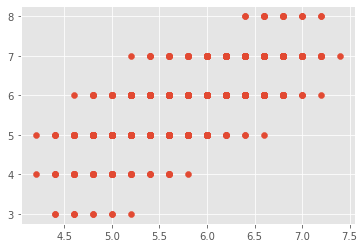

In [102]:
# Viusalize KNN predictions.
plt.scatter(pred,y)

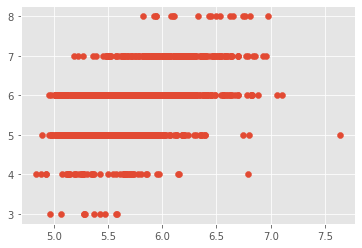

In [103]:
# Viusalize Linear model predictions.
plt.scatter(pred2,y)

Two outcomes look quite different.<br>
We have to think about whether the model is the one we want to use, or we need to to some pre-processing.<br>
I think we have to pre-process X in order for the models to make sense and result in the more accurrate predictions.<br><br>

This brings me to another of the great algorithms of the `sklearn` module: **Pre-processing**. Before model fitting I want to scale my data. `sklearn` allows me to include scaling as a part of the model and proceed with `.fit` as we did already.


In [104]:
#Import pre-processing modules
from sklearn.preprocessing import StandardScaler
#Pipeline functionality makes it easier to repeat commonly occuring steps in your modeling process.
from sklearn.pipeline import Pipeline

In [105]:
# Model 3 will be KNN using scaled data
mod3=KNeighborsRegressor().fit(X,y)
#Create a pipeline.
pipe3=Pipeline([
    ("scale",StandardScaler()),      #Standard scaler.
    ("model",KNeighborsRegressor())  # Model 3
])

In [106]:
# Fit.
pipe3.fit(X,y)

Pipeline(steps=[('scale', StandardScaler()), ('model', KNeighborsRegressor())])

In [107]:
#Predict.
pred3=pipe3.predict(X) 

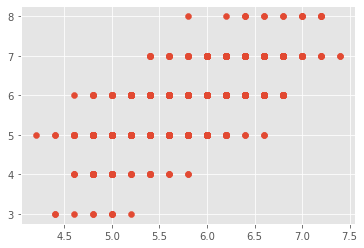

In [108]:
plt.scatter(pred3,y)

I will take the original data to evaluate this prediction. Lets take only 1 nearest neighbor.

In [109]:
# Model 4
mod4=KNeighborsRegressor().fit(X,y)
pipe4=Pipeline([
    ("scale",StandardScaler()),
    ("model",KNeighborsRegressor(n_neighbors=1)) #changed number of neighbors 
]) 

In [110]:
#Fit.
pipe4.fit(X,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('model', KNeighborsRegressor(n_neighbors=1))])

In [111]:
#Predict.
pred4=pipe4.predict(X)

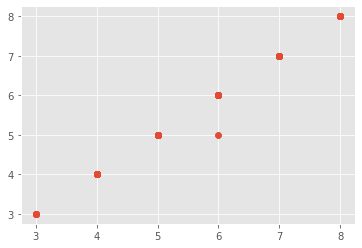

In [112]:
#Visualize.
plt.scatter(pred4,y)

It seems like the model is making a almost perfect prediction. But that is only because we are predicting on the same dataset we used to fit the data!! This raises a question - how many neighbors should we choose in order for our forecast to be the best?

Lets split the dataset into 3 and **train the model on two**, wile **test on the third part**. I can do this three times.

Here I can introduce the `GridSearchCV`. It helps to loop through predefined hyperparameters and fit our model on the training set. This way I can check for all 10 options of KNN and cross-validate three times, and decide which model will be the best one to use.[8]

In [113]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [114]:
#Get all the parameters in the model.
pipe4.get_params() 

{'memory': None,
 'steps': [('scale', StandardScaler()),
  ('model', KNeighborsRegressor(n_neighbors=1))],
 'verbose': False,
 'scale': StandardScaler(),
 'model': KNeighborsRegressor(n_neighbors=1),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 1,
 'model__p': 2,
 'model__weights': 'uniform'}

In [115]:
# Model 5
# par_grid are all parameters we want to go through.
# I want to change the parameter number of neighbors and check the model for all 10 options of numbers of neighbors.
# I also want to cross validate and set the CV parameter to 3.
mod5=GridSearchCV(estimator=pipe4,param_grid={'model__n_neighbors':[1,2,3,4,5,6,7,8,9,10]},cv=3)


In [116]:
pipe4.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scale', 'model', 'scale__copy', 'scale__with_mean', 'scale__with_std', 'model__algorithm', 'model__leaf_size', 'model__metric', 'model__metric_params', 'model__n_jobs', 'model__n_neighbors', 'model__p', 'model__weights'])

In [117]:
#Fit.
mod5.fit(X,y);

#Put this in the pandas dataframe for a nice overview.
pd.DataFrame(mod5.cv_results_) 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001668,0.000472,0.002335,0.000476,1,{'model__n_neighbors': 1},-0.314105,-0.270993,-0.630692,-0.405263,0.160371,10
1,0.001325,0.000464,0.001339,0.000468,2,{'model__n_neighbors': 2},-0.165573,-0.029845,-0.217977,-0.137798,0.079276,9
2,0.001995,0.000060,0.001669,0.000472,3,{'model__n_neighbors': 3},-0.008749,0.048331,-0.047753,-0.002724,0.039457,8
3,0.001628,0.000476,0.001724,0.000443,4,{'model__n_neighbors': 4},0.093077,0.140377,0.060227,0.097894,0.032898,7
4,0.001001,0.000020,0.001962,0.000033,5,{'model__n_neighbors': 5},0.121510,0.158875,0.127609,0.135998,0.016367,6
5,0.000997,0.000010,0.002338,0.000423,6,{'model__n_neighbors': 6},0.171408,0.188450,0.159365,0.173074,0.011932,5
6,0.000962,0.000037,0.002031,0.000036,7,{'model__n_neighbors': 7},0.180095,0.212346,0.159841,0.184094,0.021620,4
7,0.001974,0.000043,0.002027,0.000041,8,{'model__n_neighbors': 8},0.195741,0.232227,0.176191,0.201386,0.023222,3
8,0.001330,0.000480,0.001995,0.000010,9,{'model__n_neighbors': 9},0.212418,0.243351,0.209695,0.221821,0.015265,2
9,0.001326,0.000461,0.002339,0.000482,10,{'model__n_neighbors': 10},0.222014,0.259703,0.219688,0.233802,0.018340,1


Now we can see all the different statistics and decide which model is the best!

### Pre-processing
I want to dive a bit more into pre-processing. The purpose of pre-processing is to improve the performance of the model. For example, different scaling in X and y or outliers might be an issue. So, I want to re-scale the data. For that I can use `StandardScaler` from `scikit-learn`. I will use some random numbers to demonstrate an example.

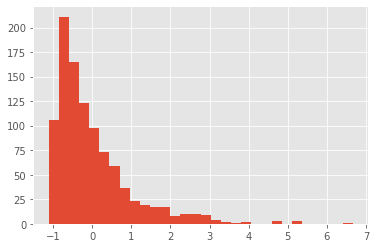

In [135]:
#Exponential functions with some noise.
x=np.random.exponential(10,(1000))+np.random.normal(0,1,(1000))
y=np.random.exponential(10,(1000))+np.random.normal(0,5,(1000))
#simulation of what StandardScaler does
plt.hist((x-np.mean(x))/np.std(x),30); 

However, the outliers still do exist. What if instead of using standard deviation I use quantiles? There might be less outliers. One cool option is to use `QuantileTransformer`

Conclusion=QT is more stabile

## References

[1] scikit-learn. Available at http://scikit-learn.org.<br>
[2] scikit-learn. Install. Available at http://scikit-learn.org/stable/install.html. <br>
[3] Anaconda. Available at https://www.anaconda.com/. <br>
[4] NumPy documentation. Available at https://numpy.org/doc/stable/index.html. <br>
[5] SciPy documentation. Available at https://scipy.github.io/devdocs/index.html. <br>
[6] Matplotlib user guide. Available at https://matplotlib.org/stable/users/index. <br>
[7] Stack abuse. Available at: https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/ <br>
[8] Towards Data Science. Cross Validation Explained. Available at: https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85
